# 0.1 Libs

In [56]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from seaborn_qqplot import pplot
from sklearn.linear_model import LinearRegression

# 0.2 Data

In [57]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '\\..\\..\\Data\\Boston.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 0.3 Fazer uma regressão linear usando lstat como predictor e medv como target

In [58]:
# Renomeando os dados para x_train e y_train
X_train = df['lstat']
Y_train = df['medv']

# Dando reshape nos dados para poder encaixar na regressão
X_trainL = X_train.values.reshape(-1, 1)
Y_trainL = Y_train.values.reshape(-1, 1)

# Fittando o xtrain e ytrain no modelo de regressão linear
Model = LinearRegression().fit(X_trainL, Y_trainL)

# Printando os dados
print("Coefficients: ", Model.coef_)
print("Intercept: ", Model.intercept_)

#Usando modelstats para pegar dados como P-value, F-statistics e R²
X_train = sm.add_constant(X_train)

# Fit do modelo
Model = sm.OLS(Y_train, X_train).fit() 

# Embelezando o print do confidence interval
confidence_interval = Model.conf_int()
confidence_interval.columns = ['Menor valor', 'Maior valor']

# Printando os valores pedidos no livro
print("\nR-squared: ", Model.rsquared)
print("F-statistic: ", Model.fvalue)
print("p-value (F-statistic): ", Model.f_pvalue)
print("\nCondidence interval:\n", confidence_interval)

Coefficients:  [[-0.95004935]]
Intercept:  [34.55384088]

R-squared:  0.5441462975864797
F-statistic:  601.6178711098953
p-value (F-statistic):  5.081103394388134e-88

Condidence interval:
        Menor valor  Maior valor
const    33.448457    35.659225
lstat    -1.026148    -0.873951


# 0.4 Plotando Regressão linear com a linha

Text(0, 0.5, 'MEDV')

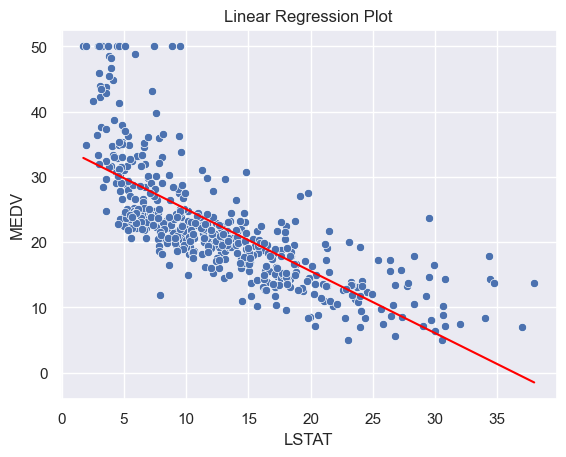

In [59]:
df['Pred'] = Model.predict(X_train)

sns.scatterplot(x='lstat', y='medv', data=df)
sns.lineplot(x='lstat', y='Pred', data=df, color='red')
plt.title('Linear Regression Plot')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 0.5 Plotando um SubPlot dos dados

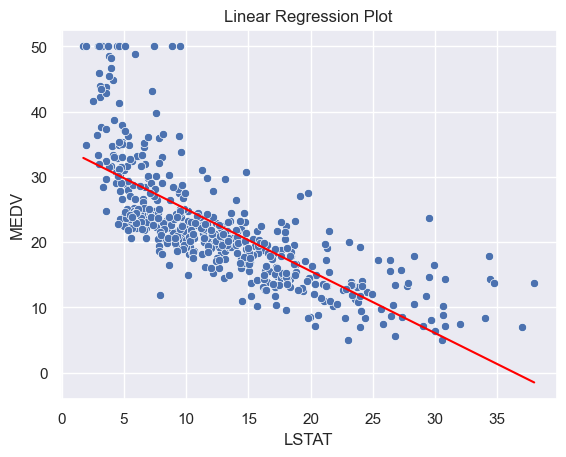

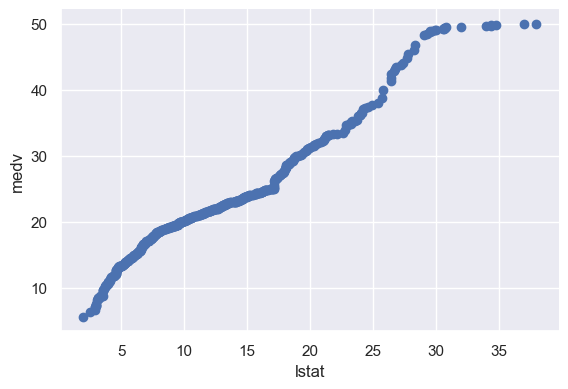

In [60]:
# No caso do livro, é usado a função da linguagem R: plot.lm(). Essa função retorna 6 plots, sendo os default:
# 1 Residual Plot | 2 Scale Location plot | 3 Q-Q Plot | 5 Residual plot agains Leverage

# Aqui faço um plot normal de regressão linear e um Q-Q plot
sns.scatterplot(x='lstat', y='medv', data=df)
sns.lineplot(x='lstat', y='Pred', data=df, color='red')
plt.title('Linear Regression Plot')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

pplot(df, x="lstat", y="medv", kind='qq', height=4, aspect=1.48)

# 0.6 Multiple Linear Regression

In [61]:
X_train = df.drop('medv', axis=1)
Y_train = df['medv']

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        06:40:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0436      0.008      5.578      0.0

# 0.7 Interaction Term

In [62]:
# Método usando apenas a statsmodels, que não é muito completo
X_train = df['lstat'] * df['age']
Y_train = df['medv']

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
# À partir daqui printamos o summary


# Da pra usar a api da statsmodels, chamada: "statsmodels.formula.api". O único problema dela é a questão de o OLS ser minúsculo xD
# Ela nos fornece um summary mais detalhado, o que vem a ser melhor do que fazer um interaction term direto da statsmodels

import statsmodels.formula.api as smf

model = smf.ols(formula='medv ~ lstat * age', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           4.86e-88
Time:                        06:40:00   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# 0.8 Non-linear Transformations of the Predictors

In [65]:
# Dentro da statmodels e a sua api é bem tranquilo fazer essas transformações, dado que podemos usar o próprio python ao nosso favor
df['lstatx2'] = df['lstat']**2
model = smf.ols(formula='medv ~ lstat + lstatx2', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          1.56e-112
Time:                        06:40:18   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.0